In [32]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

In [23]:
df_wine = pd.read_csv(
    "https://archive.ics.uci.edu/ml/" "machine-learning-databases/wine/wine.data",
    header=None,
)

df_wine.columns = [
    "Class label",
    "Alcohol",
    "Malic acid",
    "Ash",
    "Alcalinity of ash",
    "Magnesium",
    "Total phenols",
    "Flavanoids",
    "Nonflavanoid phenols",
    "Proanthocyanins",
    "Color intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline",
]

df_wine = df_wine[df_wine["Class label"] != 1]
y = df_wine["Class label"].values
X = df_wine[["Alcohol", "OD280/OD315 of diluted wines"]].values

In [24]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420


In [25]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

In [26]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=None, random_state=1)

bag = BaggingClassifier(
    estimator=tree,
    n_estimators=500,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=1,
    random_state=1,
)

In [27]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f"Decision tree train/test accuracies " f"{tree_train:.3f}/{tree_test:.3f}")

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print(f"Bagging train/test accuracies " f"{bag_train:.3f}/{bag_test:.3f}")

Decision tree train/test accuracies 1.000/0.833
Bagging train/test accuracies 1.000/0.917


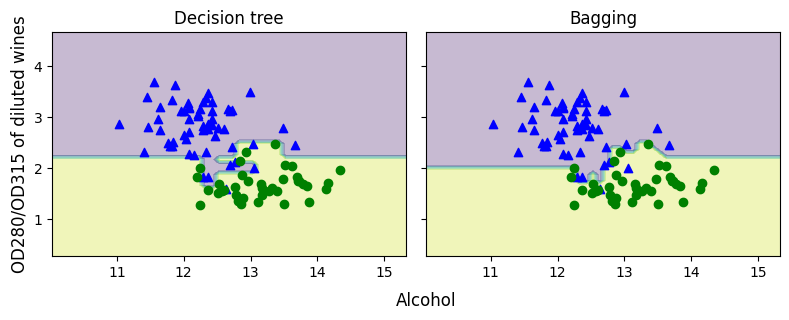

In [28]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1, ncols=2, sharex="col", sharey="row", figsize=(8, 3))


for idx, clf, tt in zip([0, 1], [tree, bag], ["Decision tree", "Bagging"]):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(
        X_train[y_train == 0, 0], X_train[y_train == 0, 1], c="blue", marker="^"
    )

    axarr[idx].scatter(
        X_train[y_train == 1, 0], X_train[y_train == 1, 1], c="green", marker="o"
    )

    axarr[idx].set_title(tt)

axarr[0].set_ylabel("OD280/OD315 of diluted wines", fontsize=12)

plt.tight_layout()
plt.text(
    0,
    -0.2,
    s="Alcohol",
    ha="center",
    va="center",
    fontsize=12,
    transform=axarr[1].transAxes,
)

plt.show()

Decision tree looks SLIGHTLY more overfit than Bagging. More testing required. May learn more as I go. 

In [29]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=1)

ada = AdaBoostClassifier(
    estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1
)

In [30]:
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f"Decision tree train/test accuracies " f"{tree_train:.3f}/{tree_test:.3f}")

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print(f"AdaBoost train/test accuracies " f"{ada_train:.3f}/{ada_test:.3f}")

Decision tree train/test accuracies 0.916/0.875


c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost train/test accuracies 1.000/0.917


c:\Users\Domenick Dobbs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


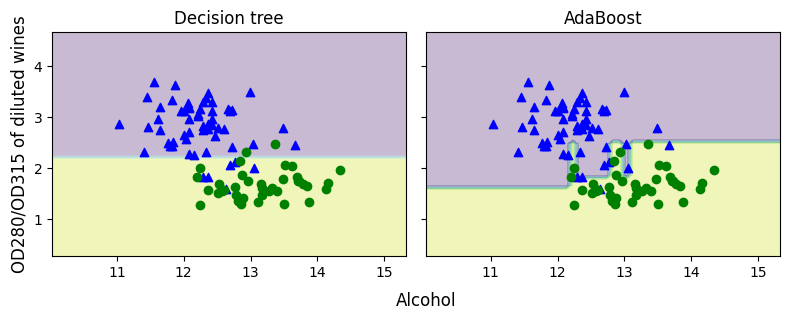

In [31]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(8, 3))


for idx, clf, tt in zip([0, 1], [tree, ada], ["Decision tree", "AdaBoost"]):
    clf.fit(X_train, y_train)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(
        X_train[y_train == 0, 0], X_train[y_train == 0, 1], c="blue", marker="^"
    )
    axarr[idx].scatter(
        X_train[y_train == 1, 0], X_train[y_train == 1, 1], c="green", marker="o"
    )
    axarr[idx].set_title(tt)

axarr[0].set_ylabel("OD280/OD315 of diluted wines", fontsize=12)

plt.tight_layout()
plt.text(
    0,
    -0.2,
    s="Alcohol",
    ha="center",
    va="center",
    fontsize=12,
    transform=axarr[1].transAxes,
)

# plt.savefig('figures/07_11.png', dpi=300, bbox_inches='tight')
plt.show()

Ada Boost looks tighter, how will it handle new data? Am I wrong about this overfitting? Need to test that next.

In [33]:
model = xgb.XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    random_state=1,
    use_label_encoder=False,
)


gbm = model.fit(X_train, y_train)

y_train_pred = gbm.predict(X_train)
y_test_pred = gbm.predict(X_test)

gbm_train = accuracy_score(y_train, y_train_pred)
gbm_test = accuracy_score(y_test, y_test_pred)
print(f"XGboost train/test accuracies " f"{gbm_train:.3f}/{gbm_test:.3f}")

XGboost train/test accuracies 0.968/0.917
